In [40]:
SUFFIX = 'HCSS_Afilt32m70_01'

# Correlate genetic and epigenetic distances

### For all sites

In [24]:
pwd

/scratch/t.cri.ksilliman/CommonG_cp2/2019_Mapping/ANGSD_run/HCSS


In [3]:
head ../../paper-oly-mbdbs-gen/analyses/methylation-filtered/dist.manhat.csv

"SeqNum.row","SeqNum.col","dist.manh","SampNum.row","SampNum.col"
1,1,0,"hc1_2","hc1_2"
1,15,273985.441785306,"ss3_15","hc1_2"
1,3,290189.490642819,"hc2_15","hc1_2"
1,17,285476.927245925,"ss3_20","hc1_2"
1,4,281520.711361473,"hc2_17","hc1_2"
1,2,298303.029739484,"hc1_4","hc1_2"
1,7,298537.38668563,"hc3_7","hc1_2"
1,16,284208.486947856,"ss3_16","hc1_2"
1,14,281305.331808996,"ss3_14","hc1_2"


In [4]:
#read in epigenetic Manhattan distance, 10 coverage 
library(spaa)
ep10 <-read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/dist.manhat.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0,298303.0,290189.5,281520.7,323694.5,288274.1,298537.4,276634.8,311367.0,297793.0,280529.9,334528.1,284554.6,281305.3,273985.4,284208.5,285476.9,297048.1
hc1_4,298303.0,0.0,288401.4,272689.0,314054.6,308425.8,290930.3,292157.4,313295.9,306377.3,291403.7,334752.1,291934.5,287946.6,285750.2,292011.5,290794.1,299482.5
hc2_15,290189.5,288401.4,0.0,267996.3,312934.8,306314.1,276217.9,283512.3,309629.3,296792.4,273417.4,339043.0,280972.0,277302.7,270960.4,281246.4,283754.6,297864.8
hc2_17,281520.7,272689.0,267996.3,0.0,314787.3,299622.6,275369.7,267637.3,306306.9,287060.1,263776.1,339119.1,274036.3,268751.4,256317.1,272144.4,273361.0,290238.7
hc3_1,323694.5,314054.6,312934.8,314787.3,0.0,334641.8,299112.8,325937.0,324463.8,321179.5,320997.4,335280.4,315988.8,313767.2,321554.2,317127.8,317475.6,315139.7
hc3_5,288274.1,308425.8,306314.1,299622.6,334641.8,0.0,315610.7,288781.8,325942.9,316722.4,306762.5,346143.9,305665.1,303050.4,296746.5,308046.6,304834.4,313945.2
hc3_7,298537.4,290930.3,276217.9,275369.7,299112.8,315610.7,0.0,292111.6,315363.0,297745.1,282259.6,341069.9,284236.7,279628.7,277165.4,285466.0,287941.8,299663.9
hc3_10,276634.8,292157.4,283512.3,267637.3,325937.0,288781.8,292111.6,0.0,317230.3,297372.5,267563.6,345360.9,279921.4,274370.7,257816.0,277769.7,274299.4,294286.7
hc3_11,311367.0,313295.9,309629.3,306306.9,324463.8,325942.9,315363.0,317230.3,0.0,306749.7,303226.0,330648.3,295962.1,294657.6,302097.9,297720.5,300676.0,304098.3
ss2_9,297793.0,306377.3,296792.4,287060.1,321179.5,316722.4,297745.1,297372.5,306749.7,0.0,253556.8,313685.4,255231.0,253726.0,268911.5,256477.3,273957.8,278320.1


In [5]:
%expand
# read in genetic distances
gen <- read.table("Results/{SUFFIX}_mbd.dist", row.names = 1, header=T)
gen
Dgen <- as.dist(gen)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0000000,0.2155436,0.2054988,0.2245761,0.2140475,0.1251035,0.2137833,0.1941731,0.2196581,0.2191748,0.2201363,0.2251679,0.2293540,0.2303018,0.2273960,0.2267536,0.2241723,0.2393679
hc1_4,0.2155436,0.0000000,0.1844240,0.1693271,0.1811331,0.2071129,0.1608409,0.2090009,0.2157563,0.2186305,0.2188330,0.2146309,0.2291905,0.2247412,0.2257357,0.2190871,0.2157204,0.2274161
hc2_15,0.2054988,0.1844240,0.0000000,0.2041950,0.1854690,0.2021604,0.1823913,0.1592689,0.2168135,0.2041132,0.2085476,0.1910094,0.2042863,0.2045106,0.2061360,0.2040459,0.2013346,0.2098602
hc2_17,0.2245761,0.1693271,0.2041950,0.0000000,0.1884048,0.2163634,0.1724402,0.2179260,0.2265039,0.2268210,0.2268209,0.2283067,0.2379735,0.2322090,0.2385235,0.2269364,0.2294361,0.2372695
hc3_1,0.2140475,0.1811331,0.1854690,0.1884048,0.0000000,0.2084380,0.1141350,0.2070880,0.2092909,0.2195993,0.2160866,0.2155464,0.2254828,0.2196778,0.2258590,0.2205749,0.2200920,0.2156870
hc3_5,0.1251035,0.2071129,0.2021604,0.2163634,0.2084380,0.0000000,0.2104185,0.1869989,0.2143060,0.2202222,0.2148287,0.2214425,0.2216537,0.2194587,0.2223524,0.2192765,0.2221298,0.2263948
hc3_7,0.2137833,0.1608409,0.1823913,0.1724402,0.1141350,0.2104185,0.0000000,0.2098760,0.2154145,0.2211945,0.2233552,0.2236631,0.2265407,0.2248371,0.2269251,0.2224353,0.2260581,0.2286600
hc3_10,0.1941731,0.2090009,0.1592689,0.2179260,0.2070880,0.1869989,0.2098760,0.0000000,0.2158190,0.2072541,0.2123815,0.2048036,0.2057382,0.2078799,0.1916720,0.2139469,0.2081097,0.2118349
hc3_11,0.2196581,0.2157563,0.2168135,0.2265039,0.2092909,0.2143060,0.2154145,0.2158190,0.0000000,0.2204729,0.2206785,0.2201360,0.2362094,0.2252514,0.2307265,0.2282604,0.2200907,0.2270442
ss2_9,0.2191748,0.2186305,0.2041132,0.2268210,0.2195993,0.2202222,0.2211945,0.2072541,0.2204729,0.0000000,0.1482022,0.1643140,0.1565610,0.1642693,0.2091080,0.1664055,0.2066793,0.1738464



Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
-53094 -17259   -937  18870  54443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   229505      15591  14.720  < 2e-16 ***
Dgen          299862      75420   3.976 0.000108 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24320 on 151 degrees of freedom
Multiple R-squared:  0.09477,	Adjusted R-squared:  0.08877 
F-statistic: 15.81 on 1 and 151 DF,  p-value: 0.0001084


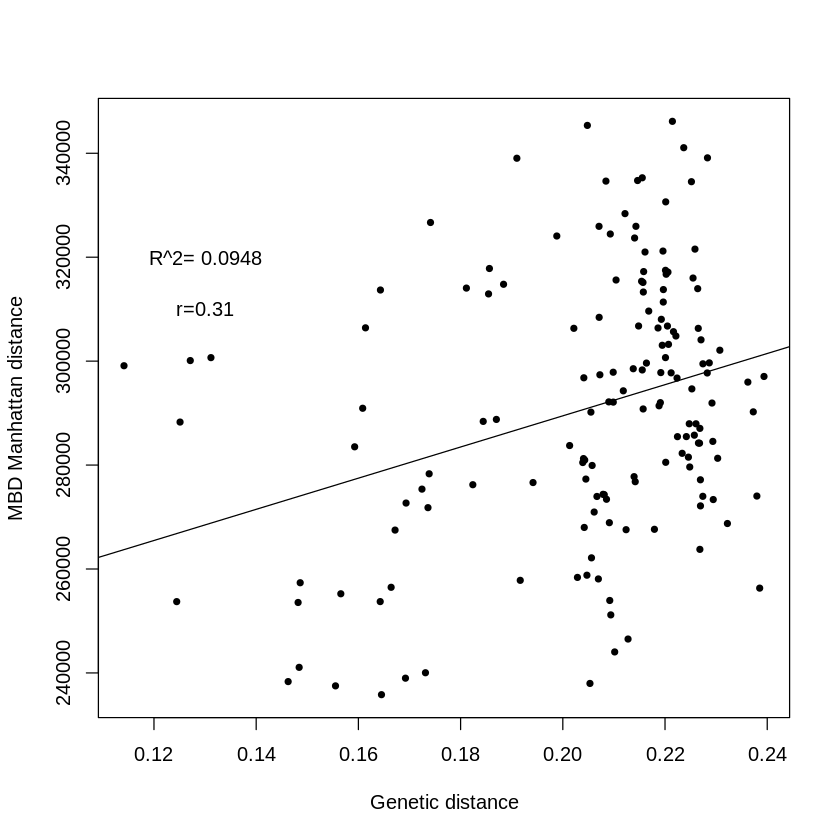

In [6]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,320000,label=paste("R^2=",R2))
text(0.13,310000,label="r=0.31")

In [7]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 3.9759, df = 151, p-value = 0.0001084
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1568240 0.4447926
sample estimates:
      cor 
0.3078416 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 444614, p-value = 0.001505
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2551332 


### For DMLs

In [8]:
#read in epigenetic Manhattan distance, 10 coverage 
library(spaa)
ep10 <-read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/dist.manhat.DMLs.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.000,10545.532,10351.204,9385.573,10610.214,6363.300,10611.443,8551.481,9068.337,14788.300,14887.002,13635.256,14606.952,14484.494,11693.997,14072.044,11702.18,13190.286
hc1_4,10545.532,0.000,9064.440,7984.184,8727.395,8905.577,8699.207,10736.499,10026.701,17346.810,16626.609,15169.867,16480.535,16347.990,14253.680,15345.568,13291.64,15195.551
hc2_15,10351.204,9064.440,0.000,8032.958,9008.169,9760.334,7750.867,10319.292,11194.320,16995.519,16120.010,15450.882,16418.206,16417.512,13740.327,15822.143,13357.00,15649.929
hc2_17,9385.573,7984.184,8032.958,0.000,9827.633,8017.600,8785.571,9408.603,10454.902,16400.962,16108.636,15381.091,15743.180,15586.173,13138.397,14668.390,12158.79,14422.239
hc3_1,10610.214,8727.395,9008.169,9827.633,0.000,8808.350,6567.108,10436.642,10554.475,16222.809,16014.164,13934.951,15248.147,14915.306,12793.947,14521.674,12503.21,13721.460
hc3_5,6363.300,8905.577,9760.334,8017.600,8808.350,0.000,9189.478,7834.229,9119.644,15202.564,15975.183,13292.572,15959.683,15121.119,11756.756,15334.174,12440.56,14534.806
hc3_7,10611.443,8699.207,7750.867,8785.571,6567.108,9189.478,0.000,10443.443,10804.160,17348.604,16705.442,14868.123,16044.562,16375.903,13350.965,16117.654,13837.97,15293.315
hc3_10,8551.481,10736.499,10319.292,9408.603,10436.642,7834.229,10443.443,0.000,10148.679,15486.501,14988.730,13497.210,15209.257,14489.565,12354.985,14441.498,11705.99,14281.504
hc3_11,9068.337,10026.701,11194.320,10454.902,10554.475,9119.644,10804.160,10148.679,0.000,15102.614,14709.279,13012.517,14188.195,14113.226,11779.373,13574.423,12187.15,13623.710
ss2_9,14788.300,17346.810,16995.519,16400.962,16222.809,15202.564,17348.604,15486.501,15102.614,0.000,9317.558,8747.628,8413.878,9119.600,10149.293,8682.160,11387.52,8899.327



Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
 -5032  -1730    -81   1508   4874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3343       1374  -2.433   0.0161 *  
Dgen           75762       6646  11.400   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2143 on 151 degrees of freedom
Multiple R-squared:  0.4625,	Adjusted R-squared:  0.459 
F-statistic:   130 on 1 and 151 DF,  p-value: < 2.2e-16


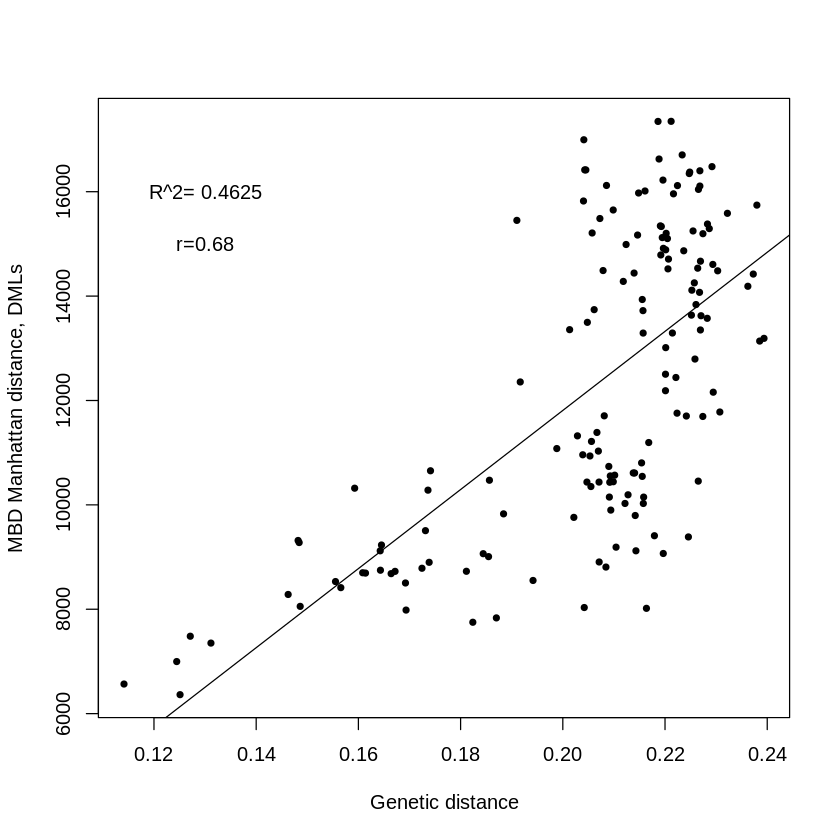

In [9]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, DMLs")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,16000,label=paste("R^2=",R2))
text(0.13,15000,label="r=0.68")

In [11]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 11.529, df = 151, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5895371 0.7603386
sample estimates:
      cor 
0.6842097 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 209532, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6489687 


# Correlate Pst and Fst  
## For overlapping genes

### All genes with methylation data

In [1]:
head ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab
wc -l ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab

"Quant_Varia"	"contig_gene"	"start_gene_2kb"	"end_gene_2kb"	"Pst_Values"
"Contig0_10497_95068"	"Contig0"	"10497"	"95068"	0.019332886629221
"Contig100_48322_58076"	"Contig100"	"48322"	"58076"	0.067008101478262
"Contig100188_1_4123"	"Contig100188"	"1"	"4123"	0.734962005060689
"Contig100199_5411_27437"	"Contig100199"	"5411"	"27437"	0.0682501114385254
"Contig100396_1_4908"	"Contig100396"	"1"	"4908"	0.185205868587485
"Contig100499_508_4044"	"Contig100499"	"508"	"4044"	0.150423262664518
"Contig1006_1_13779"	"Contig1006"	"1"	"13779"	0.0880097439836617
"Contig100691_1_8538"	"Contig100691"	"1"	"8538"	0.0188795032121047
"Contig10074_2260_6621"	"Contig10074"	"2260"	"6621"	0.251312849756899
3755 ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab


In [1]:
# read in Pst data
pst <- read.csv("../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst) <- c("id","contig","start","end","pst")
head(pst)

id,contig,start,end,pst
Contig0_10497_95068,Contig0,10497,95068,0.01933289
Contig100_48322_58076,Contig100,48322,58076,0.06700810
Contig100188_1_4123,Contig100188,1,4123,0.73496201
Contig100199_5411_27437,Contig100199,5411,27437,0.06825011
Contig100396_1_4908,Contig100396,1,4908,0.18520587
Contig100499_508_4044,Contig100499,508,4044,0.15042326


In [67]:
wc -l SFS/HCSS_sfsm70_PerGeneFst.csv

1387 SFS/HCSS_sfsm70_PerGeneFst.csv


In [68]:
# read in Fst data
fst <- read.csv("SFS/HCSS_sfsm70_PerGeneFst.csv",stringsAsFactors = F)
head(fst)

id,contig,start,end,fst01,startc
Contig103346_4131_18776,Contig103346,4131,18776,0.069637883,4131
Contig60108_1_13731,Contig60108,1,13731,0.121951220,-1959
Contig27784_1_12761,Contig27784,1,12761,0.041095890,-1603
Contig38648_3515_22246,Contig38648,3515,22246,0.047858942,3515
Contig282_38634_45331,Contig282,38634,45331,0.001798561,38634
Contig282_26273_42182,Contig282,26273,42182,0.001644737,26273


In [69]:
length(intersect(pst$id,fst$id))

[1] 153

#### 3755 genes with Pst value, 1387 genes with Fst value, 153 overlapping genes (deleted previous code)

In [5]:
both = merge(pst,fst, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,fst01,startc
Contig0_10497_95068,Contig0,10497,95068,0.01933289,Contig0,10497,95068,0.00000000,10497
Contig129_9110_46084,Contig129,9110,46084,0.06717008,Contig129,9110,46084,0.10091743,9110
Contig1433_1_13800,Contig1433,1,13800,0.20530881,Contig1433,1,13800,0.02343096,-1090
Contig149134_128_4495,Contig149134,128,4495,0.19887867,Contig149134,128,4495,0.00000000,128
Contig150_19372_41619,Contig150,19372,41619,0.05184581,Contig150,19372,41619,0.00000000,19372
Contig15379_1_16373,Contig15379,1,16373,0.14359508,Contig15379,1,16373,0.08383234,-471



Call:
lm(formula = both$pst ~ both$fst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28604 -0.16328 -0.04899  0.12906  0.61181 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.23115    0.01916   12.07   <2e-16 ***
both$fst     0.16017    0.15402    1.04      0.3    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2011 on 151 degrees of freedom
Multiple R-squared:  0.007111,	Adjusted R-squared:  0.0005354 
F-statistic: 1.081 on 1 and 151 DF,  p-value: 0.3


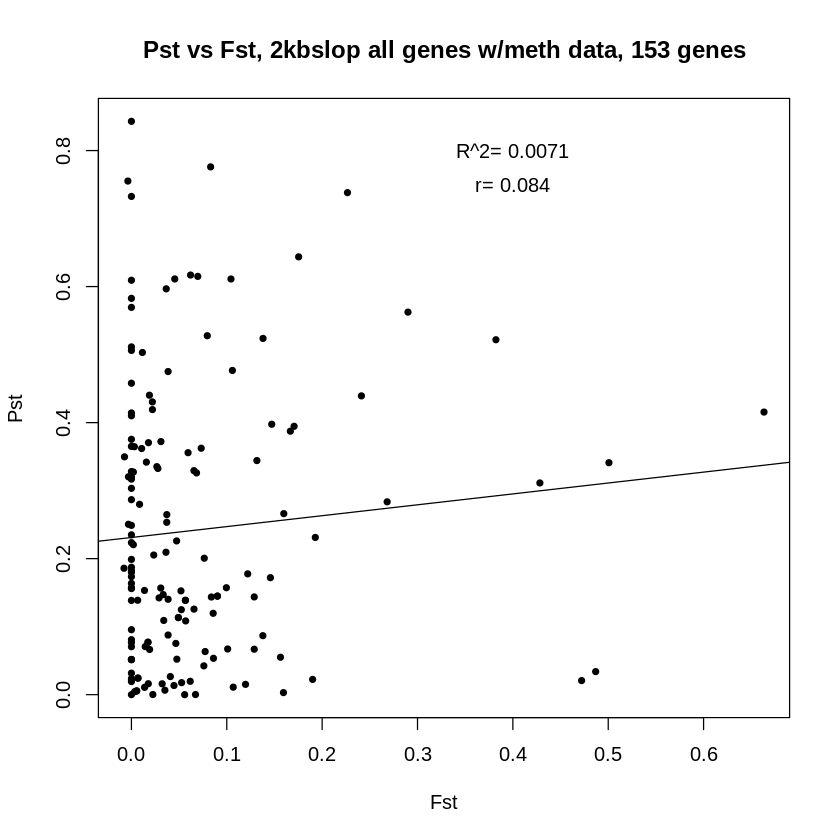

In [6]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 2kbslop all genes w/meth data, 153 genes")
summary(lm(both$pst~both$fst),)
R2 = round(summary(lm(both$pst~both$fst))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= 0.084")

In [7]:
cor.test( ~ both$pst + both$fst,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst
t = 1.0399, df = 151, p-value = 0.3
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07536088  0.23979514
sample estimates:
       cor 
0.08432562 


Warning message in cor.test.default(x = c(0.019332886629221, 0.0671700837540604, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst
S = 608620, p-value = 0.8097
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01962841 


#### Get gene annotations for these overlaps

In [8]:
module load gcc/6.2.0
module load bedtools/2.29.0

In [17]:
chr <- as.character(both$contig.x)
start <- both$startc +2000
end <- both$end.x-2000
fst <- paste(both$fst01, both$pst, sep="_")
bed <- cbind(chr,start,end,fst)

In [18]:
write.table(bed,"Results/fstpst_2kbslop.tab",row.names = F, col.names = F,quote = F, sep = "\t")

In [19]:
intersectBed \
  -wb \
  -a "../../paper-oly-mbdbs-gen/genome-features/Olurida_v081-20190709.gene.gff" \
  -b "Results/fstpst_2kbslop.tab" \
  > "Results/fstpst_2kbslop.genes"

In [31]:
both[which(both$fst01 >0.4),]

,id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,fst01,startc
35,Contig20413_1_17467,Contig20413,1,17467,0.02072460,Contig20413,1,17467,0.4720812,-1515
61,Contig24693_2452_15381,Contig24693,2452,15381,0.34105167,Contig24693,2452,15381,0.5007496,2452
75,Contig28902_528_13774,Contig28902,528,13774,0.31127971,Contig28902,528,13774,0.4283427,528
133,Contig50657_1_11990,Contig50657,1,11990,0.03393099,Contig50657,1,11990,0.4868217,-1888
149,Contig77382_1559_12918,Contig77382,1559,12918,0.41550369,Contig77382,1559,12918,0.6633523,1559


Low Pst, high Fst

In [22]:
grep "Contig20413" Results/fstpst_2kbslop.genes

Contig20413	maker	gene	486	15467	.	-	.	ID=OLUR_00010706;Name=OLUR_00010706;Alias=maker-Contig20413-snap-gene-0.3;Note=Similar to sll1388: Universal stress protein Sll1388 (Synechocystis sp. (strain PCC 6803 / Kazusa) OX%3D1111708);Dbxref=CDD:cd00293,Coils:Coil,Gene3D:G3DSA:3.40.50.620,InterPro:IPR006015,InterPro:IPR006016,InterPro:IPR014729,PRINTS:PR01438,Pfam:PF00582,SUPERFAMILY:SSF52402;	Contig20413	485	15467	0.472081218274112_0.0207245979022085


In [26]:
grep "Contig50657" Results/fstpst_2kbslop.genes

Contig50657	maker	gene	113	9990	.	+	.	ID=OLUR_00017738;Name=OLUR_00017738;Alias=maker-Contig50657-snap-gene-0.3;Note=Similar to KDM3B: Lysine-specific demethylase 3B (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.60.120.650,InterPro:IPR003347,MobiDBLite:mobidb-lite,Pfam:PF02373,ProSiteProfiles:PS51184,SMART:SM00558,SUPERFAMILY:SSF51197;	Contig50657	112	9990	0.486821705426357_0.0339309902311326


Mid Pst, high Fst

In [24]:
grep "Contig24693" Results/fstpst_2kbslop.genes

Contig24693	maker	gene	4453	13381	.	+	.	ID=OLUR_00007682;Name=OLUR_00007682;Alias=maker-Contig24693-snap-gene-0.4;Note=Protein of unknown function;Dbxref=Gene3D:G3DSA:1.10.533.10,InterPro:IPR000488,InterPro:IPR011029,MobiDBLite:mobidb-lite,ProSiteProfiles:PS50017,SUPERFAMILY:SSF47986;Ontology_term=GO:0005515,GO:0007165;	Contig24693	4452	13381	0.500749625187406_0.341051670666079


In [28]:
grep "Contig28902" Results/fstpst_2kbslop.genes

Contig28902	maker	gene	2529	11774	.	-	.	ID=OLUR_00000830;Name=OLUR_00000830;Alias=maker-Contig28902-snap-gene-0.12;Note=Similar to SPON1: Spondin-1 (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.20.100.10,Gene3D:G3DSA:2.60.40.2130,InterPro:IPR000884,InterPro:IPR009465,InterPro:IPR036383,InterPro:IPR038678,MobiDBLite:mobidb-lite,Pfam:PF00090,Pfam:PF06468,ProSiteProfiles:PS50092,ProSiteProfiles:PS51020,SMART:SM00209,SUPERFAMILY:SSF82895;	Contig28902	2528	11774	0.428342674139311_0.311279707225457


In [29]:
grep "Contig77382" Results/fstpst_2kbslop.genes

Contig77382	maker	gene	3560	10918	.	+	.	ID=OLUR_00016056;Name=OLUR_00016056;Alias=snap_masked-Contig77382-processed-gene-0.0;Note=Similar to Socs5: Suppressor of cytokine signaling 5 (Mus musculus OX%3D10090);Dbxref=Gene3D:G3DSA:3.30.505.10,InterPro:IPR000980,InterPro:IPR036860,MobiDBLite:mobidb-lite,Pfam:PF00017,SUPERFAMILY:SSF55550;	Contig77382	3559	10918	0.663352272727273_0.415503687742715


In [33]:
both[which(both$fst01 <0.05 & both$pst > 0.5),]

,id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,fst01,startc
21,Contig17925_1_18528,Contig17925,1,18528,0.5966850,Contig17925,1,18528,0.036496350,-1976
23,Contig18485_27692_52779,Contig18485,27692,52779,0.7325620,Contig18485,27692,52779,0.000000000,27692
38,Contig206988_1_7220,Contig206988,1,7220,0.5694211,Contig206988,1,7220,0.000000000,-62
62,Contig24745_17400_35588,Contig24745,17400,35588,0.6093125,Contig24745,17400,35588,0.000000000,17400
68,Contig26949_1_10303,Contig26949,1,10303,0.6112204,Contig26949,1,10303,0.045454545,-1561
83,Contig308_249_28454,Contig308,249,28454,0.5031230,Contig308,249,28454,0.011494253,249
93,Contig32566_4290_23883,Contig32566,4290,23883,0.8429597,Contig32566,4290,23883,0.000000000,4290
108,Contig37588_11392_33472,Contig37588,11392,33472,0.7551651,Contig37588,11392,33472,-0.003696858,11392
116,Contig408_19615_27287,Contig408,19615,27287,0.5061239,Contig408,19615,27287,0.000000000,19615
119,Contig42610_7960_46080,Contig42610,7960,46080,0.5826824,Contig42610,7960,46080,0.000000000,7960


High Pst, 0 Fst

In [34]:
grep "Contig18485" Results/fstpst_2kbslop.genes

Contig18485	maker	gene	29693	50779	.	+	.	ID=OLUR_00001082;Name=OLUR_00001082;Alias=maker-Contig18485-snap-gene-0.8;Note=Similar to RREB1: Ras-responsive element-binding protein 1 (Gallus gallus OX%3D9031);Dbxref=Gene3D:G3DSA:3.30.160.60,InterPro:IPR013087,InterPro:IPR036236,MobiDBLite:mobidb-lite,Pfam:PF00096,Pfam:PF13894,Pfam:PF13909,Pfam:PF13912,ProSitePatterns:PS00028,ProSiteProfiles:PS50157,SMART:SM00355,SUPERFAMILY:SSF57667;Ontology_term=GO:0003676;	Contig18485	29692	50779	0_0.732561964781362


In [35]:
grep "Contig32566" Results/fstpst_2kbslop.genes

Contig32566	maker	gene	6291	21883	.	+	.	ID=OLUR_00002794;Name=OLUR_00002794;Alias=snap_masked-Contig32566-processed-gene-0.0;Note=Protein of unknown function;Dbxref=MobiDBLite:mobidb-lite;	Contig32566	6290	21883	0_0.842959727422853
Contig32566	maker	gene	11055	21883	.	-	.	ID=OLUR_00002795;Name=OLUR_00002795;Alias=maker-Contig32566-snap-gene-0.7;Note=Similar to HECTD1: E3 ubiquitin-protein ligase HECTD1 (Homo sapiens OX%3D9606);Dbxref=CDD:cd00204,Coils:Coil,Gene3D:G3DSA:1.25.40.20,Gene3D:G3DSA:2.30.30.920,Gene3D:G3DSA:2.60.120.260,InterPro:IPR002110,InterPro:IPR008979,InterPro:IPR010606,InterPro:IPR012919,InterPro:IPR020683,InterPro:IPR036770,InterPro:IPR037252,MobiDBLite:mobidb-lite,Pfam:PF06701,Pfam:PF07738,Pfam:PF13857,ProSiteProfiles:PS50088,ProSiteProfiles:PS50297,ProSiteProfiles:PS51416,SMART:SM00248,SUPERFAMILY:SSF159034,SUPERFAMILY:SSF48403,SUPERFAMILY:SSF49785;Ontology_term=GO:0004842,GO:0005515,GO:0016567,GO:0046872;	Contig32566	6290	21883	0_0.842959727422853


In [36]:
grep "Contig24745" Results/fstpst_2kbslop.genes

Contig24745	maker	gene	34282	42112	.	-	.	ID=OLUR_00002447;Name=OLUR_00002447;Alias=maker-Contig24745-snap-gene-0.9;Note=Similar to Safb: Scaffold attachment factor B1 (Rattus norvegicus OX%3D10116);Dbxref=Coils:Coil,Gene3D:G3DSA:3.30.70.330,InterPro:IPR000504,InterPro:IPR012677,InterPro:IPR035979,MobiDBLite:mobidb-lite,Pfam:PF00076,ProSiteProfiles:PS50102,SMART:SM00360,SUPERFAMILY:SSF54928;Ontology_term=GO:0003676;	Contig24745	34281	42112	0_0.180041054517271
Contig24745	maker	gene	19401	33588	.	-	.	ID=OLUR_00002446;Name=OLUR_00002446;Alias=maker-Contig24745-snap-gene-0.7;Note=Protein of unknown function;Dbxref=Coils:Coil;	Contig24745	19400	33588	0_0.609312492150559


In [37]:
grep "Contig206988" Results/fstpst_2kbslop.genes

Contig206988	maker	gene	1939	5220	.	+	.	ID=OLUR_00024466;Name=OLUR_00024466;Alias=snap_masked-Contig206988-processed-gene-0.0;Note=Similar to Wdr54: WD repeat-containing protein 54 (Mus musculus OX%3D10090);Dbxref=InterPro:IPR036322,SUPERFAMILY:SSF50978;Ontology_term=GO:0005515;	Contig206988	1938	5220	0_0.569421104074838


In [38]:
grep "Contig37588" Results/fstpst_2kbslop.genes

Contig37588	maker	gene	23621	31472	.	+	.	ID=OLUR_00003310;Name=OLUR_00003310;Alias=maker-Contig37588-snap-gene-0.4;Note=Similar to G2/mitotic-specific cyclin-B (Patella vulgata OX%3D6465);Dbxref=CDD:cd00043,Gene3D:G3DSA:1.10.472.10,InterPro:IPR004367,InterPro:IPR006671,InterPro:IPR013763,InterPro:IPR036915,Pfam:PF00134,Pfam:PF02984,ProSitePatterns:PS00292,SUPERFAMILY:SSF47954;Ontology_term=GO:0005634;	Contig37588	13392	31472	-0.00369685767097967_0.755165121036154
Contig37588	maker	gene	13393	14183	.	+	.	ID=OLUR_00003308;Name=OLUR_00003308;Alias=maker-Contig37588-snap-gene-0.3;Note=Similar to AK6: Adenylate kinase isoenzyme 6 (Bos taurus OX%3D9913);Dbxref=Gene3D:G3DSA:3.40.50.300,Hamap:MF_00039,InterPro:IPR020618,InterPro:IPR027417,Pfam:PF13238,SUPERFAMILY:SSF52540;Ontology_term=GO:0004017,GO:0005524;	Contig37588	13392	31472	-0.00369685767097967_0.755165121036154
Contig37588	maker	gene	13393	31472	.	-	.	ID=OLUR_00003309;Name=OLUR_00003309;Alias=maker-Contig37588-snap-gene-0.5;Note=Prote

In [39]:
grep "Contig408" Results/fstpst_2kbslop.genes

Contig408	maker	gene	21616	25287	.	+	.	ID=OLUR_00006735;Name=OLUR_00006735;Alias=maker-Contig408-snap-gene-0.4;Note=Protein of unknown function;	Contig408	21615	25287	0_0.506123851809769
Contig408	maker	gene	21681	25287	.	-	.	ID=OLUR_00006736;Name=OLUR_00006736;Alias=maker-Contig408-snap-gene-0.7;Note=Similar to Thap1: THAP domain-containing protein 1 (Rattus norvegicus OX%3D10116);Dbxref=Gene3D:G3DSA:3.30.40.180,InterPro:IPR006612,InterPro:IPR038441,Pfam:PF05485,ProSiteProfiles:PS50950,SMART:SM00692,SMART:SM00980,SUPERFAMILY:SSF57716;Ontology_term=GO:0003676;	Contig408	21615	25287	0_0.506123851809769


### 5 methylated sites per gene (old)

In [22]:
grep "Contig20413" Results/fstpst_2kbslop.genes

Contig20413	maker	gene	486	15467	.	-	.	ID=OLUR_00010706;Name=OLUR_00010706;Alias=maker-Contig20413-snap-gene-0.3;Note=Similar to sll1388: Universal stress protein Sll1388 (Synechocystis sp. (strain PCC 6803 / Kazusa) OX%3D1111708);Dbxref=CDD:cd00293,Coils:Coil,Gene3D:G3DSA:3.40.50.620,InterPro:IPR006015,InterPro:IPR006016,InterPro:IPR014729,PRINTS:PR01438,Pfam:PF00582,SUPERFAMILY:SSF52402;	Contig20413	485	15467	0.472081218274112_0.0207245979022085


In [35]:
head ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab
wc -l ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab

"Quant_Varia"	"contig_gene"	"start_gene_2kb"	"end_gene_2kb"	"Pst_Values"
"Contig0_10497_95068"	"Contig0"	"10497"	"95068"	0.019332886629221
"Contig100188_1_4123"	"Contig100188"	"1"	"4123"	0.734962005060689
"Contig100396_1_4908"	"Contig100396"	"1"	"4908"	0.185205868587485
"Contig100994_1_8602"	"Contig100994"	"1"	"8602"	0.701143568206082
"Contig1013_14071_19514"	"Contig1013"	"14071"	"19514"	0.0172219569940594
"Contig1013_16204_21663"	"Contig1013"	"16204"	"21663"	0.0395933279259626
"Contig101333_3371_8675"	"Contig101333"	"3371"	"8675"	0.712270890827424
"Contig10144_1_8748"	"Contig10144"	"1"	"8748"	0.229975030080655
"Contig101661_1_5354"	"Contig101661"	"1"	"5354"	0.345600927439141
1394 ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab


In [36]:
# read in Pst data
pst <- read.csv("../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst) <- c("id","contig","start","end","pst")
head(pst)

id,contig,start,end,pst
Contig0_10497_95068,Contig0,10497,95068,0.01933289
Contig100188_1_4123,Contig100188,1,4123,0.73496201
Contig100396_1_4908,Contig100396,1,4908,0.18520587
Contig100994_1_8602,Contig100994,1,8602,0.70114357
Contig1013_14071_19514,Contig1013,14071,19514,0.01722196
Contig1013_16204_21663,Contig1013,16204,21663,0.03959333


In [37]:
wc -l SFS/HCSS_sfsm70_PerGeneFst.csv

1387 SFS/HCSS_sfsm70_PerGeneFst.csv


In [38]:
# read in Fst data
fst <- read.csv("SFS/HCSS_sfsm70_PerGeneFst.csv",stringsAsFactors = F)
head(fst)

id,contig,start,end,fst01
Contig103346_4131_18776,Contig103346,4131,18776,0.069637883
Contig60108_1_13731,Contig60108,1,13731,0.121951220
Contig27784_1_12761,Contig27784,1,12761,0.041095890
Contig38648_3515_22246,Contig38648,3515,22246,0.047858942
Contig282_38634_45331,Contig282,38634,45331,0.001798561
Contig282_26273_42182,Contig282,26273,42182,0.001644737


In [39]:
length(intersect(pst$id,fst$id))

[1] 64

#### 1394 genes with Pst values, 1387 genes with Fst values (including those with Fst=0), only 64 overlapping genes

In [40]:
both = merge(pst,fst, by ="id")
both <- both[,c("id","pst","fst01")]
head(both)

id,pst,fst01
Contig0_10497_95068,0.01933289,0.00000000
Contig1433_1_13800,0.20530881,0.02343096
Contig15905_1_15190,0.05149559,0.00000000
Contig15905_1_35236,0.05149559,0.00000000
Contig16063_563_35013,0.12577787,0.06563707
Contig16203_1_18094,0.11331736,0.04923077



Call:
lm(formula = both$pst ~ both$fst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29403 -0.17988 -0.07144  0.12928  0.60292 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24004    0.03382   7.098 1.45e-09 ***
both$fst     0.18060    0.28676   0.630    0.531    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2252 on 62 degrees of freedom
Multiple R-squared:  0.006357,	Adjusted R-squared:  -0.009669 
F-statistic: 0.3967 on 1 and 62 DF,  p-value: 0.5311


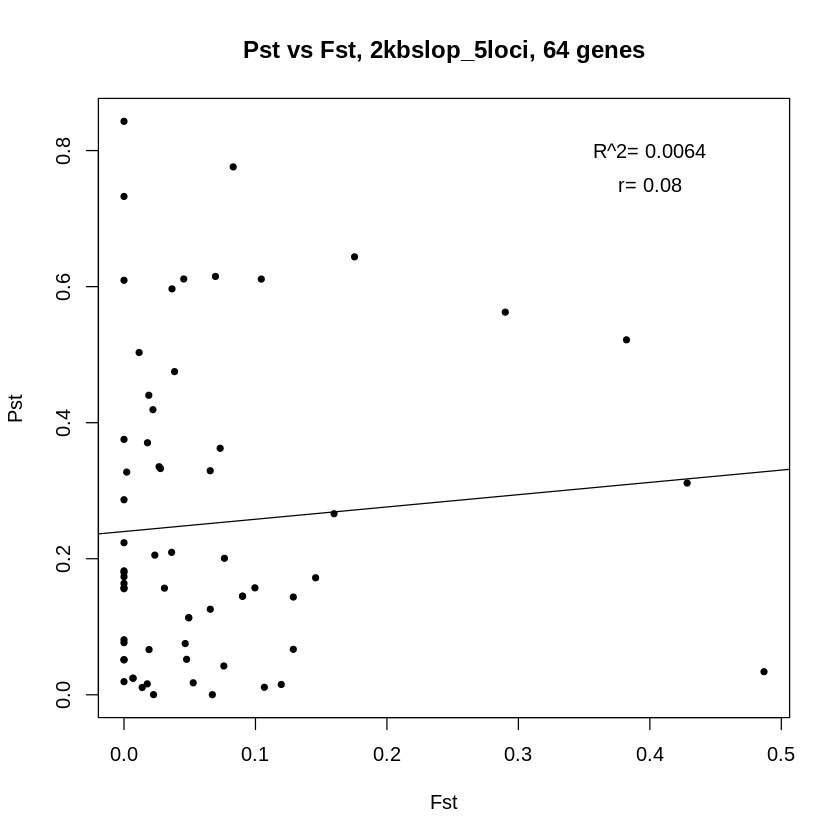

In [47]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 2kbslop_5loci, 64 genes")
summary(lm(both$pst~both$fst),)
R2 = round(summary(lm(both$pst~both$fst))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= 0.08")

In [42]:
cor.test( ~ both$pst + both$fst,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst
t = 0.62981, df = 62, p-value = 0.5311
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1693982  0.3192828
sample estimates:
       cor 
0.07973106 


Warning message in cor.test.default(x = c(0.019332886629221, 0.205308806060111, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst
S = 42830, p-value = 0.8787
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01946097 


### 3 methylated sites per gene

In [25]:
head ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop_3loci.tab
wc -l ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop_3loci.tab

"Quant_Varia"	"contig_gene"	"start_gene_2kb"	"end_gene_2kb"	"Pst_Values"
"Contig0_10497_95068"	"Contig0"	"10497"	"95068"	0.019332886629221
"Contig100188_1_4123"	"Contig100188"	"1"	"4123"	0.734962005060689
"Contig100396_1_4908"	"Contig100396"	"1"	"4908"	0.185205868587485
"Contig100743_7752_12849"	"Contig100743"	"7752"	"12849"	0.513177756897547
"Contig100994_1_8602"	"Contig100994"	"1"	"8602"	0.701143568206082
"Contig10117_48_10916"	"Contig10117"	"48"	"10916"	0.0512787574778887
"Contig1013_14071_19514"	"Contig1013"	"14071"	"19514"	0.0172219569940594
"Contig1013_16204_21663"	"Contig1013"	"16204"	"21663"	0.0395933279259626
"Contig101333_3371_8675"	"Contig101333"	"3371"	"8675"	0.712270890827424
2178 ../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop_3loci.tab


In [48]:
# read in Pst data
pst <- read.csv("../../paper-oly-mbdbs-gen/analyses/DMGs/Pst_gene_2kbslop_3loci.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst) <- c("id","contig","start","end","pst")
head(pst)

id,contig,start,end,pst
Contig0_10497_95068,Contig0,10497,95068,0.01933289
Contig100188_1_4123,Contig100188,1,4123,0.73496201
Contig100396_1_4908,Contig100396,1,4908,0.18520587
Contig100743_7752_12849,Contig100743,7752,12849,0.51317776
Contig100994_1_8602,Contig100994,1,8602,0.70114357
Contig10117_48_10916,Contig10117,48,10916,0.05127876


In [49]:
wc -l SFS/HCSS_sfsm70_PerGeneFst.csv

1387 SFS/HCSS_sfsm70_PerGeneFst.csv


In [50]:
# read in Fst data
fst <- read.csv("SFS/HCSS_sfsm70_PerGeneFst.csv",stringsAsFactors = F)
head(fst)

id,contig,start,end,fst01
Contig103346_4131_18776,Contig103346,4131,18776,0.069637883
Contig60108_1_13731,Contig60108,1,13731,0.121951220
Contig27784_1_12761,Contig27784,1,12761,0.041095890
Contig38648_3515_22246,Contig38648,3515,22246,0.047858942
Contig282_38634_45331,Contig282,38634,45331,0.001798561
Contig282_26273_42182,Contig282,26273,42182,0.001644737


In [51]:
length(intersect(pst$id,fst$id))

[1] 96

#### 2178 genes with Pst values, 1387 genes with Fst values (including those with Fst=0), only 96 overlapping genes

In [52]:
both = merge(pst,fst, by ="id")
both <- both[,c("id","pst","fst01")]
head(both)

id,pst,fst01
Contig0_10497_95068,0.01933289,0.00000000
Contig1433_1_13800,0.20530881,0.02343096
Contig149134_128_4495,0.19887867,0.00000000
Contig15595_31612_64402,0.15324152,0.01369863
Contig15905_1_15190,0.05149559,0.00000000
Contig15905_1_35236,0.05149559,0.00000000



Call:
lm(formula = both$pst ~ both$fst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27744 -0.17026 -0.05201  0.11454  0.60272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.24024    0.02442   9.838 4.05e-16 ***
both$fst     0.14612    0.19709   0.741     0.46    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.205 on 94 degrees of freedom
Multiple R-squared:  0.005813,	Adjusted R-squared:  -0.004763 
F-statistic: 0.5496 on 1 and 94 DF,  p-value: 0.4603


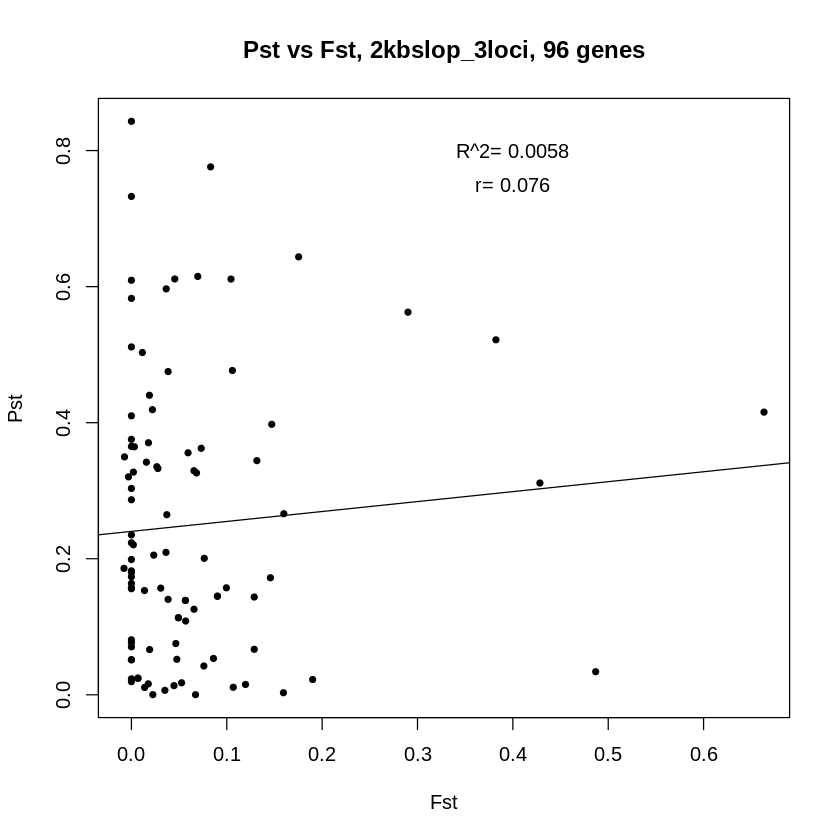

In [53]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 2kbslop_3loci, 96 genes")
summary(lm(both$pst~both$fst),)
R2 = round(summary(lm(both$pst~both$fst))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= 0.076")

In [32]:
cor.test( ~ both$pst + both$fst,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst
t = 0.74136, df = 94, p-value = 0.4603
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1261713  0.2725629
sample estimates:
       cor 
0.07624322 


Warning message in cor.test.default(x = c(0.019332886629221, 0.205308806060111, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst
S = 154628, p-value = 0.6371
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04875152 


## Pst vs Fst for random sites in genome  
### 1000 bp bins

In [41]:
sfsSuf = "SFS/HCSS_sfsm70"

In [42]:
module load gcc/6.2.0
module load xz/5.2.2 
module load bzip2/1.0.6
module load bedtools/2.29.0

In [2]:
bedtools makewindows -h


Tool: bedtools makewindows
Version: v2.29.0
Summary: Makes adjacent or sliding windows across a genome or BED file.

Usage: bedtools makewindows [OPTIONS] [-g <genome> OR -b <bed>]
 [ -w <window_size> OR -n <number of windows> ]

Input Options: 
	-g <genome>
		Genome file size (see notes below).
		Windows will be created for each chromosome in the file.

	-b <bed>
		BED file (with chrom,start,end fields).
		Windows will be created for each interval in the file.

Windows Output Options: 
	-w <window_size>
		Divide each input interval (either a chromosome or a BED interval)
		to fixed-sized windows (i.e. same number of nucleotide in each window).
		Can be combined with -s <step_size>

	-s <step_size>
		Step size: i.e., how many base pairs to step before
		creating a new window. Used to create "sliding" windows.
		- Defaults to window size (non-sliding windows).

	-n <number_of_windows>
		Divide each input interval (either a chromosome or a BED interval)
		to fixed number of windows (i.e

: 1

In [3]:
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 1000 > Olurida_v081_1kbIntervals.bed

In [6]:
head Olurida_v081_1kbIntervals.bed

Contig0	0	1000
Contig0	1000	2000
Contig0	2000	3000
Contig0	3000	4000
Contig0	4000	5000
Contig0	5000	6000
Contig0	6000	7000
Contig0	7000	8000
Contig0	8000	9000
Contig0	9000	10000


In [73]:
# reading regions
regions=read.table("Olurida_v081_1kbIntervals.bed")
names(regions)=c("contig","start","end")

In [74]:
# read in fst data
fst01=read.table("SFS/HCSS_sfsm70_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [75]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
363405   5882 

,contig,pos,a,b
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.034,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [ ]:
fst

In [11]:
# computing weighted Fst per region
i=1;gfst01=c();ns01=0
pb=txtProgressBar(0,nrow(regions))
for (i in 1:nrow(regions)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==regions$contig[i] & pos>=regions$start[i] & pos<=regions$end[i])
	if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
		gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
	}
}

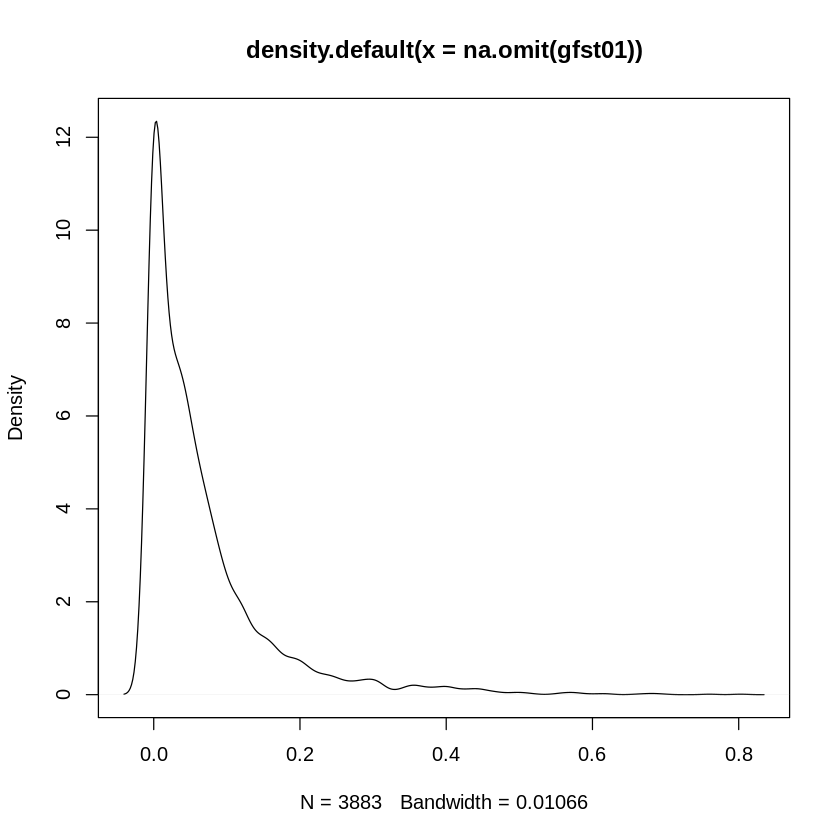

In [12]:
# density plots of per-region Fst
plot(density(na.omit(gfst01)))

In [18]:
%expand
#adding results to regions table, saving
regions$fst01=gfst01
regionsNA <- regions[!is.na(regions$fst01),]
head(regionsNA)
write.csv(regionsNA,file="{sfsSuf}_Per1kbFst.csv",quote=F,row.names=F)
#save bed file of intervals only with fst data


,contig,start,end,fst01
75,Contig0,74000,75000,0.00000000
110,Contig0,109000,110000,0.06770833
158,Contig1,40000,41000,0.00000000
160,Contig1,42000,43000,0.03846154
216,Contig2,10000,11000,0.02127660
342,Contig2,136000,137000,0.00000000


In [45]:
nrow(regionsNA)

[1] 3883

In [22]:
%expand
filtbed <- regionsNA[,c("contig","start","end")]
write.table(filtbed, "{sfsSuf}_1kb.bed",quote=F,row.names=F,col.names = F)

In [23]:
%expand
head {sfsSuf}_1kb.bed

Contig0 74000 75000
Contig0 109000 110000
Contig1 40000 41000
Contig1 42000 43000
Contig2 10000 11000
Contig2 136000 137000
Contig3 14000 15000
Contig4 51000 52000
Contig8 75000 76000
Contig9 17000 18000


#### Compare with overlappin Pst bins

In [52]:
%expand
regionsNA <- read.csv("{sfsSuf}_Per1kbFst.csv")
id <- paste(regionsNA$contig,regionsNA$start,regionsNA$end, sep = "_")
regionsNA <- cbind(id,regionsNA)
head(regionsNA)

id,contig,start,end,fst01
Contig0_74000_75000,Contig0,74000,75000,0.00000000
Contig0_109000_110000,Contig0,109000,110000,0.06770833
Contig1_40000_41000,Contig1,40000,41000,0.00000000
Contig1_42000_43000,Contig1,42000,43000,0.03846154
Contig2_10000_11000,Contig2,10000,11000,0.02127660
Contig2_136000_137000,Contig2,136000,137000,0.00000000


In [50]:
# read in Pst data
pst1kb <- read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/Pst_bins_1kb.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst1kb) <- c("id","contig","start","end","pst","pst.lowCI","pst.highCI")
head(pst1kb)
nrow(pst1kb)

id,contig,start,end,pst,pst.lowCI,pst.highCI
Contig10074_5000_6000,Contig10074,5000,6000,0.25131285,0.0008842925,0.8672152
Contig100771_1000_1852,Contig100771,1000,1852,0.34311448,0.0015001933,0.8588288
Contig126977_2000_3000,Contig126977,2000,3000,0.62651934,0.0210034318,0.8771075
Contig128060_1000_1680,Contig128060,1000,1680,0.01810252,0.0005849085,0.8363022
Contig129509_0_1000,Contig129509,0,1000,0.24973351,0.0015760069,0.8427798
Contig132115_1000_1816,Contig132115,1000,1816,0.21746108,0.0009032690,0.8652226


[1] 71

#### 71 overlapping bins

In [57]:
both = merge(pst1kb,regionsNA, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

id,contig.x,start.x,end.x,pst,pst.lowCI,pst.highCI,contig.y,start.y,end.y,fst01
Contig10074_5000_6000,Contig10074,5000,6000,0.25131285,0.0008842925,0.8672152,Contig10074,5000,6000,0.19201995
Contig100771_1000_1852,Contig100771,1000,1852,0.34311448,0.0015001933,0.8588288,Contig100771,1000,1852,0.14919355
Contig126977_2000_3000,Contig126977,2000,3000,0.62651934,0.0210034318,0.8771075,Contig126977,2000,3000,0.01584507
Contig128060_1000_1680,Contig128060,1000,1680,0.01810252,0.0005849085,0.8363022,Contig128060,1000,1680,0.04655870
Contig129509_0_1000,Contig129509,0,1000,0.24973351,0.0015760069,0.8427798,Contig129509,0,1000,0.04545455
Contig132115_1000_1816,Contig132115,1000,1816,0.21746108,0.0009032690,0.8652226,Contig132115,1000,1816,0.01709402



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28231 -0.19942 -0.02921  0.14795  0.52908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28394    0.03259   8.712 9.98e-13 ***
both$fst01  -0.10975    0.37560  -0.292    0.771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2266 on 69 degrees of freedom
Multiple R-squared:  0.001236,	Adjusted R-squared:  -0.01324 
F-statistic: 0.08537 on 1 and 69 DF,  p-value: 0.771


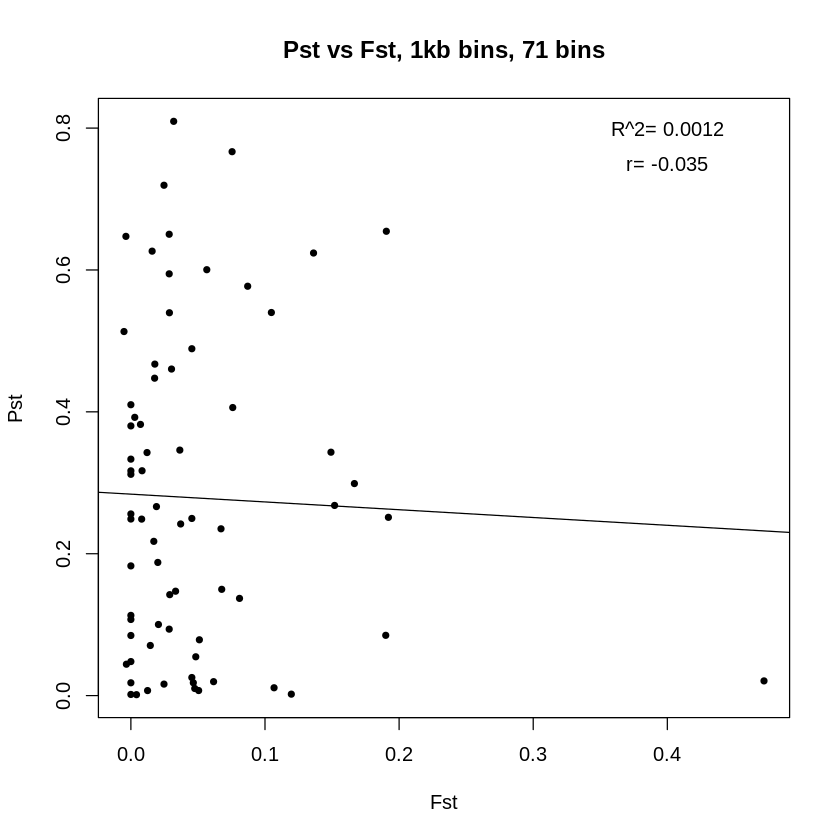

In [59]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 1kb bins, 71 bins")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= -0.035")

In [58]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = -0.29219, df = 69, p-value = 0.771
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2662733  0.1997889
sample estimates:
        cor 
-0.03515334 


Warning message in cor.test.default(x = c(0.251312849756899, 0.343114484406881, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 58217, p-value = 0.8435
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02385219 


#### Get gene annotations for these overlaps

In [8]:
module load gcc/6.2.0
module load bedtools/2.29.0

In [17]:
chr <- as.character(both$contig.x)
start <- both$startc +2000
end <- both$end.x-2000
fst <- paste(both$fst01, both$pst, sep="_")
bed <- cbind(chr,start,end,fst)

In [18]:
write.table(bed,"Results/fstpst_2kbslop.tab",row.names = F, col.names = F,quote = F, sep = "\t")

In [19]:
intersectBed \
  -wb \
  -a "../../paper-oly-mbdbs-gen/genome-features/Olurida_v081-20190709.gene.gff" \
  -b "Results/fstpst_2kbslop.tab" \
  > "Results/fstpst_2kbslop.genes"

In [31]:
both[which(both$fst01 >0.4),]

,id,contig.x,start.x,end.x,pst,contig.y,start.y,end.y,fst01,startc
35,Contig20413_1_17467,Contig20413,1,17467,0.02072460,Contig20413,1,17467,0.4720812,-1515
61,Contig24693_2452_15381,Contig24693,2452,15381,0.34105167,Contig24693,2452,15381,0.5007496,2452
75,Contig28902_528_13774,Contig28902,528,13774,0.31127971,Contig28902,528,13774,0.4283427,528
133,Contig50657_1_11990,Contig50657,1,11990,0.03393099,Contig50657,1,11990,0.4868217,-1888
149,Contig77382_1559_12918,Contig77382,1559,12918,0.41550369,Contig77382,1559,12918,0.6633523,1559


Low Pst, high Fst

In [22]:
grep "Contig20413" Results/fstpst_2kbslop.genes

Contig20413	maker	gene	486	15467	.	-	.	ID=OLUR_00010706;Name=OLUR_00010706;Alias=maker-Contig20413-snap-gene-0.3;Note=Similar to sll1388: Universal stress protein Sll1388 (Synechocystis sp. (strain PCC 6803 / Kazusa) OX%3D1111708);Dbxref=CDD:cd00293,Coils:Coil,Gene3D:G3DSA:3.40.50.620,InterPro:IPR006015,InterPro:IPR006016,InterPro:IPR014729,PRINTS:PR01438,Pfam:PF00582,SUPERFAMILY:SSF52402;	Contig20413	485	15467	0.472081218274112_0.0207245979022085


In [26]:
grep "Contig50657" Results/fstpst_2kbslop.genes

Contig50657	maker	gene	113	9990	.	+	.	ID=OLUR_00017738;Name=OLUR_00017738;Alias=maker-Contig50657-snap-gene-0.3;Note=Similar to KDM3B: Lysine-specific demethylase 3B (Homo sapiens OX%3D9606);Dbxref=Gene3D:G3DSA:2.60.120.650,InterPro:IPR003347,MobiDBLite:mobidb-lite,Pfam:PF02373,ProSiteProfiles:PS51184,SMART:SM00558,SUPERFAMILY:SSF51197;	Contig50657	112	9990	0.486821705426357_0.0339309902311326


In [97]:
wc -l SFS/HCSS_sfsm70_slidingwindow

2773 SFS/HCSS_sfsm70_slidingwindow


### 10,000 bp bins

In [24]:
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 10000 > Olurida_v081_10kbIntervals.bed

In [25]:
head Olurida_v081_10kbIntervals.bed

Contig0	0	10000
Contig0	10000	20000
Contig0	20000	30000
Contig0	30000	40000
Contig0	40000	50000
Contig0	50000	60000
Contig0	60000	70000
Contig0	70000	80000
Contig0	80000	90000
Contig0	90000	100000


In [35]:
# reading regions
regions=read.table("Olurida_v081_10kbIntervals.bed")
names(regions)=c("contig","start","end")

In [36]:
# read in fst data
fst01=read.table("SFS/HCSS_sfsm70_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [37]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
363405   5882 

,contig,pos,a,b
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.034,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [38]:
# computing weighted Fst per region
i=1;gfst01=c();ns01=0
pb=txtProgressBar(0,nrow(regions))
for (i in 1:nrow(regions)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==regions$contig[i] & pos>=regions$start[i] & pos<=regions$end[i])
	if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
		gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
	}
}

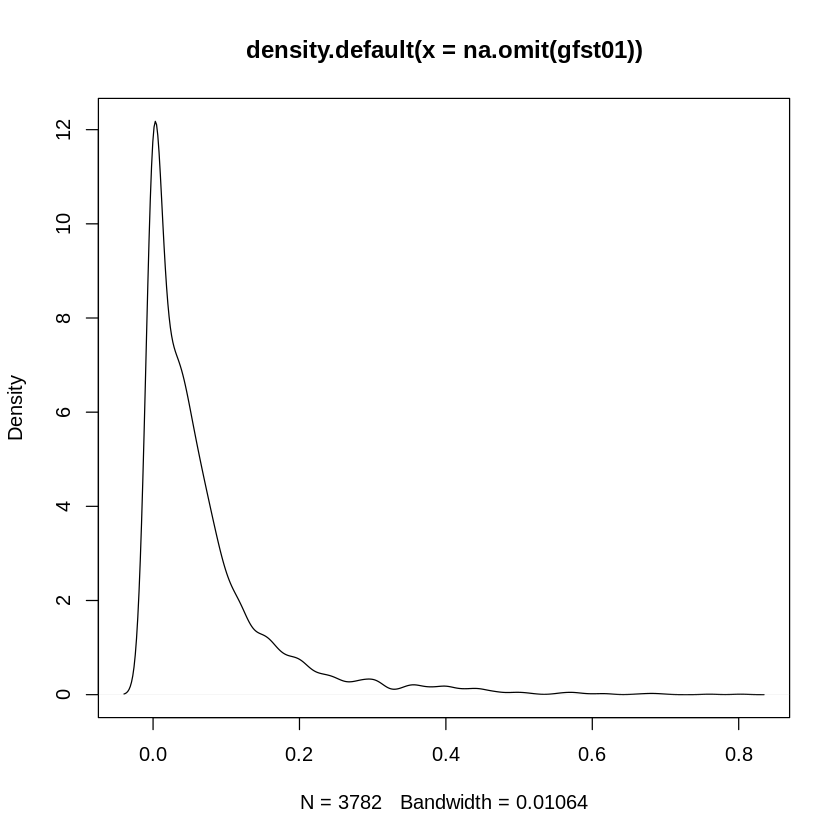

In [39]:
# density plots of per-region Fst
plot(density(na.omit(gfst01)))

In [40]:
%expand
#adding results to regions table, saving
regions$fst01=gfst01
regionsNA <- regions[!is.na(regions$fst01),]
head(regionsNA)
write.csv(regionsNA,file="{sfsSuf}_Per10kbFst.csv",quote=F,row.names=F)
#save bed file of intervals only with fst data

,contig,start,end,fst01
8,Contig0,70000,80000,0.00000000
11,Contig0,100000,110000,0.06770833
17,Contig1,40000,50000,0.03448276
23,Contig2,10000,20000,0.02127660
35,Contig2,130000,139250,0.00000000
37,Contig3,10000,20000,0.25287356


In [41]:
nrow(regionsNA)

[1] 3782

In [42]:
%expand
filtbed <- regionsNA[,c("contig","start","end")]
write.table(filtbed, "{sfsSuf}_10kb.bed",quote=F,row.names=F,col.names = F)

#### Compare with overlappin Pst bins

In [60]:
%expand
regionsNA <- read.csv("{sfsSuf}_Per10kbFst.csv")
id <- paste(regionsNA$contig,regionsNA$start,regionsNA$end, sep = "_")
regionsNA <- cbind(id,regionsNA)
head(regionsNA)

id,contig,start,end,fst01
Contig0_70000_80000,Contig0,70000,80000,0.00000000
Contig0_100000_110000,Contig0,100000,110000,0.06770833
Contig1_40000_50000,Contig1,40000,50000,0.03448276
Contig2_10000_20000,Contig2,10000,20000,0.02127660
Contig2_130000_139250,Contig2,130000,139250,0.00000000
Contig3_10000_20000,Contig3,10000,20000,0.25287356


In [61]:
# read in Pst data
pst10kb <- read.csv("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/Pst_bins_10kb.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst10kb) <- c("id","contig","start","end","pst","pst.lowCI","pst.highCI")
head(pst10kb)
nrow(pst10kb)

id,contig,start,end,pst,pst.lowCI,pst.highCI
Contig0_70000_80000,Contig0,70000,80000,0.6136306,0.011347886,0.8948949
Contig10074_0_6621,Contig10074,0,6621,0.2513128,0.001205032,0.8501561
Contig100771_0_1852,Contig100771,0,1852,0.3431145,0.001595068,0.8617699
Contig10259_0_9151,Contig10259,0,9151,0.2439721,0.000979882,0.8090206
Contig103223_10000_14834,Contig103223,10000,14834,0.3743660,0.001878200,0.8601134
Contig104217_0_5491,Contig104217,0,5491,0.4712576,0.011812632,0.8385497


[1] 271

#### 271 overlapping bins

In [62]:
both = merge(pst10kb,regionsNA, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

id,contig.x,start.x,end.x,pst,pst.lowCI,pst.highCI,contig.y,start.y,end.y,fst01
Contig0_70000_80000,Contig0,70000,80000,0.6136306,0.011347886,0.8948949,Contig0,70000,80000,0.0000000
Contig10074_0_6621,Contig10074,0,6621,0.2513128,0.001205032,0.8501561,Contig10074,0,6621,0.1920200
Contig100771_0_1852,Contig100771,0,1852,0.3431145,0.001595068,0.8617699,Contig100771,0,1852,0.1491935
Contig10259_0_9151,Contig10259,0,9151,0.2439721,0.000979882,0.8090206,Contig10259,0,9151,0.1026694
Contig103223_10000_14834,Contig103223,10000,14834,0.3743660,0.001878200,0.8601134,Contig103223,10000,14834,0.0000000
Contig104217_0_5491,Contig104217,0,5491,0.4712576,0.011812632,0.8385497,Contig104217,0,5491,0.0000000



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27271 -0.19651 -0.02384  0.14066  0.72989 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.272758   0.016211  16.826   <2e-16 ***
both$fst01  -0.009332   0.143242  -0.065    0.948    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.22 on 269 degrees of freedom
Multiple R-squared:  1.578e-05,	Adjusted R-squared:  -0.003702 
F-statistic: 0.004245 on 1 and 269 DF,  p-value: 0.9481


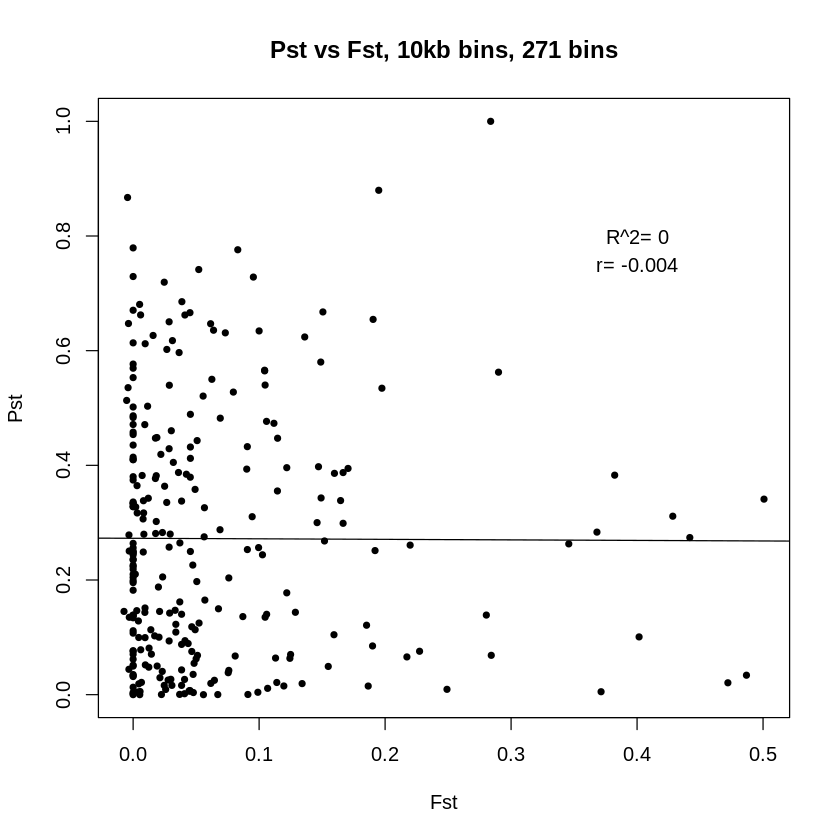

In [66]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 10kb bins, 271 bins")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= -0.004")

In [64]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = -0.065151, df = 269, p-value = 0.9481
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1230691  0.1152373
sample estimates:
         cor 
-0.003972307 


Warning message in cor.test.default(x = c(0.613630567871362, 0.251312849756899, :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 3376696, p-value = 0.7682
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0179847 


# Correlating PC scores for genetic and epigenetic

### All methylation data

In [38]:
# Read in PC scores from epigenetics
ep <- read.table("../../paper-oly-mbdbs-gen/analyses/methylation-filtered/PC-scores-filtered-methylation.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [11]:
key = read.csv("../../paper-oly-mbdbs-gen/data/sample-key.csv",colClasses = c("character","character"))

In [40]:
samples = rownames(ep)
mapdf <- data.frame(old=key$X...MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [41]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
hc1_2,-6.692850,4.371347,17.3591858,-9.77823057,0.03392218,-29.86492405,35.5278752,30.6193584,-4.9343922,1.6809432,-0.33319001,3.635139,-7.4010422,-1.7594517,3.1929463,0.78578319,-4.4636713,-2.304060e-14
hc1_4,-1.070833,15.671612,-0.3928227,-1.70710015,41.23235880,35.77341278,2.2218207,22.6387392,9.6957465,-0.1030809,-0.86444586,7.793098,2.1127411,-1.9011238,1.0629236,2.77676877,0.2719266,-4.127601e-14
hc2_15,-12.299954,10.306976,-8.1557636,-2.70502528,18.69976530,-31.90777310,-18.5266121,-11.0064755,32.4791342,-12.9709720,-12.42688061,6.839118,-5.7880514,-0.1922841,2.8387897,0.27435155,2.0688240,-2.724470e-14
hc2_17,-20.447126,9.462505,-2.1141525,4.20049318,11.22313158,-0.77622031,0.7696665,-5.0742263,-2.9998595,-1.6355382,15.84724957,-44.577822,-11.9680384,6.4587427,-9.2348469,-8.24820025,-1.5929793,1.984524e-14
hc3_1,39.034523,48.607826,-14.8380393,24.54435834,-20.88827041,3.21539341,13.3872950,-6.7302612,5.4916718,-3.3313800,0.04068923,1.333991,0.3918315,1.5024459,-0.5308704,2.08230580,-0.6792729,-1.282481e-14
hc3_5,-4.158491,15.894780,56.6155610,-2.33521782,-19.01246614,7.46016914,-25.9280178,3.7768436,0.2410256,-3.1401753,1.99055907,2.008911,-3.5426766,-0.3045020,0.8488112,-0.11514156,1.4576012,1.117509e-14
hc3_7,-3.864274,15.873938,-20.7614296,2.15581022,7.59235360,-16.98380550,-28.4280712,11.2734120,-33.2551537,19.2619936,4.18859370,7.355386,7.3000877,-5.3908788,-0.3526813,-0.96549984,1.6868523,-3.011653e-14
hc3_10,-26.775638,5.285006,16.3128676,3.29961637,11.01994934,-0.50438638,19.8221442,-30.5733695,-9.8219832,4.1390918,-10.16929815,3.537457,30.0290917,-6.4407773,-8.5153142,0.40346723,4.6974825,-2.846074e-14
hc3_11,27.358771,4.769939,-8.5306352,-59.71357725,-3.74778573,4.63932148,1.8642351,-13.3416913,-4.0485879,-6.2794531,8.25416810,-1.321221,1.6583165,-1.7369624,3.7856504,-0.97944952,0.8468419,-1.080733e-14
ss2_9,6.465812,-14.429699,-9.6526527,-1.47541437,-13.23682631,4.77846200,-6.5708353,18.3475636,-5.9277610,-17.3833320,-36.74039835,-16.780138,16.3704203,11.1439572,-1.2996767,-0.69204759,-0.3559637,4.914472e-15


In [45]:
%expand
gen <- read.table("Results/{SUFFIX}pca_covMat.tsv",)
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_10","hc3_11","hc3_5","hc3_7",
        "ss2_14","ss2_18","ss2_9","ss3_14","ss3_15","ss3_16","ss3_20","ss3_3","ss5_18")
rownames(gen) <- mbdorder
gen
#make sure ep and gen in same order
ep <- ep[mbdorder,]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Pop
hc1_2,-0.169157009,0.32979333,-0.0925416296,0.50520867,-0.294133348,0.26493543,-0.06140564,-0.006872229,0.04954539,-0.03079583,0.16689447,-0.019328195,-0.35883554,0.29791521,-0.122308974,-0.111055481,-0.375556625,0.144280831,HC
hc1_4,-0.271757005,-0.34897316,-0.2228580558,0.07179135,0.140243789,0.05948359,0.23457074,-0.431635637,0.58806689,-0.31398495,-0.05176609,0.072893855,-0.08775922,-0.04412887,0.022912601,-0.146603418,0.022401047,-0.020879124,HC
hc2_15,-0.071626776,-0.08966038,-0.0397213904,-0.09019719,0.008315516,-0.08914973,-0.13072719,-0.577920092,-0.10440079,0.71562241,-0.01947412,0.022977518,-0.18519793,0.22058976,0.071916895,-0.041643594,0.064886645,0.004739740,HC
hc2_17,-0.298667880,-0.46065814,0.1709509477,0.50626010,0.477551173,-0.14189869,-0.12229645,0.248062189,-0.22116443,0.09107086,0.10440924,-0.118132992,-0.02734497,0.03632917,0.021668054,-0.059933906,-0.003101467,0.013541656,HC
hc3_1,-0.256597468,-0.26360918,-0.1601116901,-0.25708967,-0.429531489,-0.01684808,-0.01589535,0.228308475,-0.20952811,-0.03248925,0.06665936,-0.095151431,-0.09836574,0.02562810,0.010099832,-0.650256453,0.209656174,-0.009993740,HC
hc3_10,-0.065071796,0.29433533,-0.1021351748,0.05611128,0.049239062,-0.72913326,0.52168553,-0.007792869,-0.08157511,-0.05036670,0.21913731,0.012004485,-0.11929153,0.11770265,0.002913704,-0.032029642,0.047016400,-0.024292181,HC
hc3_11,-0.125488142,0.01373902,0.8988541987,-0.11639476,-0.143160319,-0.01167964,0.05355827,-0.120221710,0.11441735,-0.16274347,0.03271447,-0.005991747,-0.19713438,0.15824428,0.058861658,-0.028844206,0.117987901,-0.042665776,HC
hc3_5,-0.143120769,0.25833924,-0.0773359071,0.39861545,-0.166206946,0.13312088,-0.01994485,0.001502115,0.08777540,0.06530467,-0.01659665,-0.105096992,0.07948560,-0.09322778,0.197338624,0.138111410,0.761771924,-0.159821780,HC
hc3_7,-0.318831783,-0.31672402,-0.1685526135,-0.20871865,-0.302968493,-0.06214955,-0.05833547,0.105436774,-0.07224308,-0.10760250,0.15323289,-0.041115290,-0.18920247,0.18938030,-0.009664227,0.707551090,0.006904790,-0.038549729,HC
ss2_14,0.243532694,-0.05325667,-0.0112504003,0.02660362,0.010415915,0.05821443,-0.07413337,-0.389989744,-0.30450396,-0.25018469,0.43696327,-0.402573092,-0.25713079,-0.44736762,-0.003418302,0.017336869,0.024482783,0.021291751,SS



Call:
lm(formula = gen$PC1 ~ ep$PC2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.212094 -0.088553 -0.005015  0.076451  0.264273 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.018408   0.032040   0.575    0.574    
ep$PC2      -0.011094   0.001805  -6.147  1.4e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1359 on 16 degrees of freedom
Multiple R-squared:  0.7025,	Adjusted R-squared:  0.6839 
F-statistic: 37.79 on 1 and 16 DF,  p-value: 1.404e-05


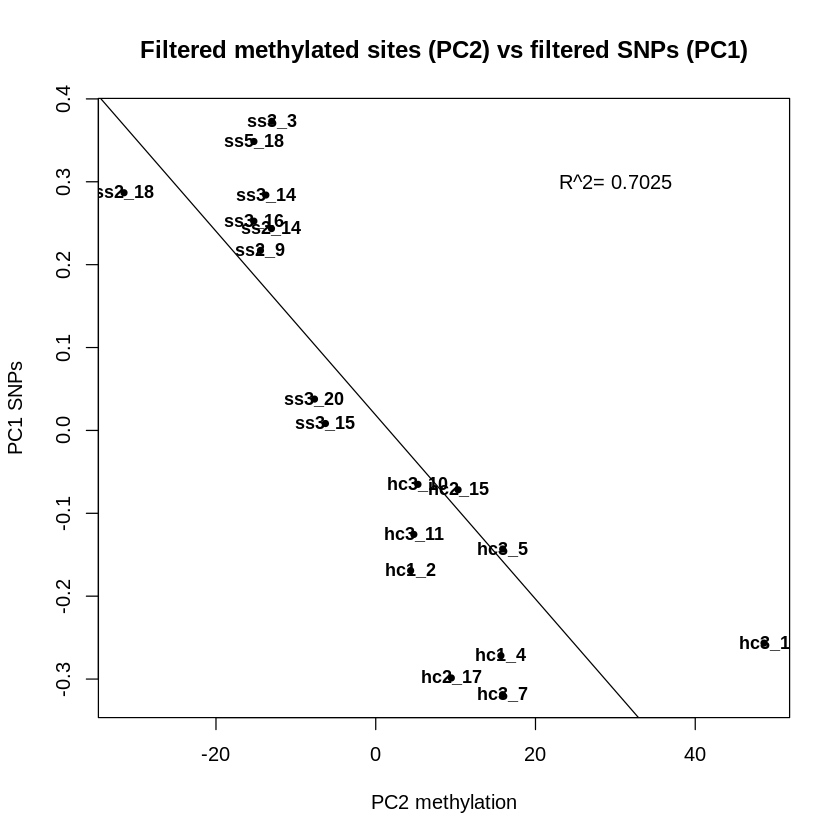

In [57]:
plot(ep$PC2,gen$PC1, pch=20,cex=1,xlab = "PC2 methylation", ylab = "PC1 SNPs")
title("Filtered methylated sites (PC2) vs filtered SNPs (PC1)")
summary(lm(gen$PC1~ep$PC2),)
R2 = round(summary(lm(gen$PC1~ep$PC2))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$PC1~ep$PC2))
text(30,0.3,label=paste("R^2=",R2))
text(ep$PC2,gen$PC1, labels=rownames(ep), cex=0.9, font=2)

In [58]:
cor.test( ~ ep$PC2 + gen$PC1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC2 + gen$PC1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC2 and gen$PC1
t = -6.1473, df = 16, p-value = 1.404e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9379921 -0.6100194
sample estimates:
       cor 
-0.8381768 



	Spearman's rank correlation rho

data:  ep$PC2 and gen$PC1
S = 1802, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8596491 


### DMLs

In [63]:
# Read in PC scores from epigenetics
ep <- read.table("../../paper-oly-mbdbs-gen/analyses/DMLs/PC-scores-DMLs.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [64]:
key = read.csv("../../paper-oly-mbdbs-gen/data/sample-key.csv",colClasses = c("character","character"))

In [65]:
samples = rownames(ep)
mapdf <- data.frame(old=key$X...MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [66]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
hc1_2,2.58520529,2.52082478,-1.2085058,0.42322452,0.54325748,0.1039631,-0.12694825,0.76376345,-0.96942144,0.26802083,0.28865161,-1.51780782,0.445506029,-0.12625313,0.1374234782,-0.405429804,-0.004794839,3.330669e-16
hc1_4,3.37080780,-2.03165236,0.8702686,-1.29204441,1.91824968,-0.4996976,0.47911154,0.31219593,0.35561796,0.80971097,0.02913808,0.74960408,0.446178287,0.07594788,-0.0002381671,-0.673094503,-0.135790637,-2.498002e-16
hc2_15,3.86829394,-1.33681409,0.8650964,0.78709933,-1.26146005,0.1721864,0.56342577,-0.88795865,-0.37425513,-0.80642763,0.80413379,0.04505579,0.379095401,-0.90594140,0.3619052557,0.223859298,-0.273138785,1.026956e-15
hc2_17,3.38228858,-0.79641793,-1.4876656,-1.25664040,1.33311484,0.6280170,0.11835032,0.50985459,0.59488917,-1.38658333,-0.59549147,-0.19059968,0.066777983,-0.30390921,-0.9218117044,0.217071952,0.093162128,7.632783e-16
hc3_1,1.81393178,-0.67259628,2.9870456,-0.40833186,-0.96025334,-0.8174120,-1.02180183,0.91534553,-0.92598761,0.98324685,-0.64844127,-0.10305661,-0.135350626,-0.55412374,-0.2333078766,0.277394323,0.218305193,-4.163336e-17
hc3_5,3.15464787,1.72341264,-1.1378371,-0.05172669,1.01491175,-0.8237016,0.87441578,0.89248770,-0.20670025,0.26927195,0.92423115,0.80427163,0.124159134,0.40792642,0.3863396250,0.562323232,0.195555875,-4.059253e-16
hc3_7,3.03723117,-2.21797016,0.5758374,0.82823062,-2.29779396,-0.1390859,0.01737066,0.38127916,0.42014818,-0.85970261,0.16518251,-0.31089880,-0.278629464,0.98636768,0.2374751890,-0.291878869,0.210038774,-4.128642e-16
hc3_10,3.12657476,2.05163630,-1.4785213,2.64148283,-0.56936840,0.1551002,-0.50077137,-0.37443424,0.85983088,0.36632514,-0.67663699,0.71482050,-0.818042865,-0.47403996,0.0124800260,-0.267051183,0.003900828,6.938894e-17
hc3_11,1.90514384,-0.10053224,-0.2313423,-0.02410457,1.00028093,-1.0818482,-1.08862894,-2.84220098,-0.68173469,0.30161141,-0.22254763,-0.25552827,-0.009977519,0.67586623,-0.2296772481,0.210401103,-0.042430308,5.412337e-16
ss2_9,-3.29604933,-0.36696617,-1.1240478,-1.64678552,-0.03140524,-1.1444626,-2.12193257,0.06073731,1.59177805,-0.14269409,0.03296847,-0.21700577,0.298625486,-0.34382530,0.7520590765,0.067221294,0.038251681,-1.665335e-16


In [67]:
%expand
#make sure ep and gen in same order
ep <- ep[mbdorder,]


Call:
lm(formula = gen$PC1 ~ ep$PC1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148275 -0.052397  0.007205  0.045458  0.180223 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.018408   0.020769   0.886    0.389    
ep$PC1      -0.069865   0.006601 -10.583 1.24e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08812 on 16 degrees of freedom
Multiple R-squared:  0.875,	Adjusted R-squared:  0.8672 
F-statistic:   112 on 1 and 16 DF,  p-value: 1.241e-08


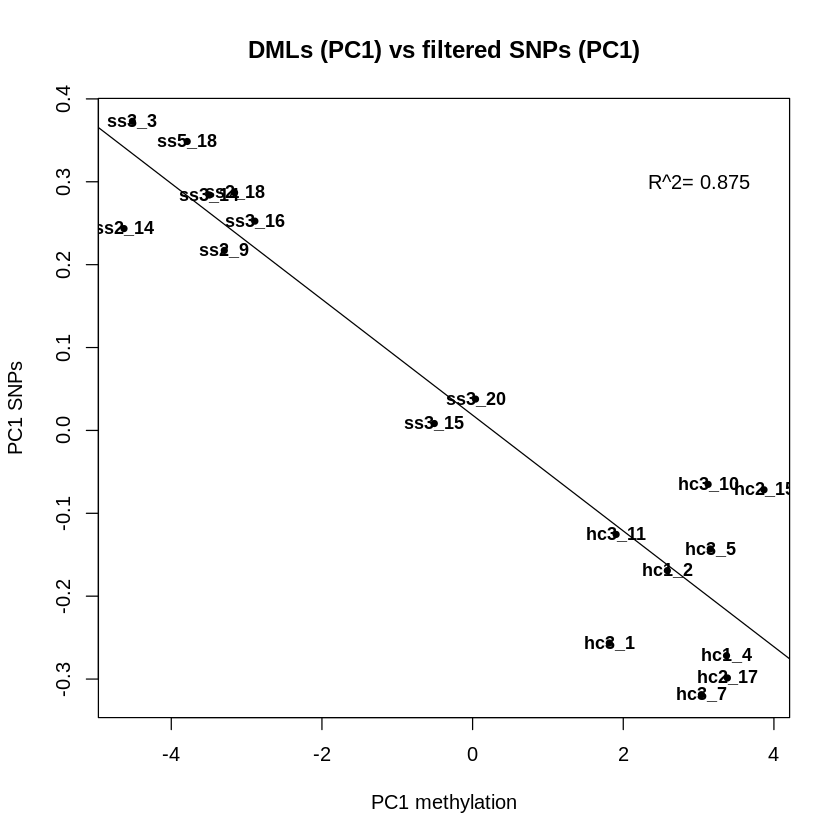

In [69]:
plot(ep$PC1,gen$PC1, pch=20,cex=1,xlab = "PC1 methylation", ylab = "PC1 SNPs")
title("DMLs (PC1) vs filtered SNPs (PC1)")
summary(lm(gen$PC1~ep$PC1),)
R2 = round(summary(lm(gen$PC1~ep$PC1))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$PC1~ep$PC1))
text(3,0.3,label=paste("R^2=",R2))
text(ep$PC1,gen$PC1, labels=rownames(ep), cex=0.9, font=2)

In [70]:
cor.test( ~ ep$PC1 + gen$PC1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC1 + gen$PC1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC1 and gen$PC1
t = -10.583, df = 16, p-value = 1.241e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9760352 -0.8318183
sample estimates:
       cor 
-0.9354179 



	Spearman's rank correlation rho

data:  ep$PC1 and gen$PC1
S = 1768, p-value = 2.01e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8245614 
